# **CAPSTONE PROJECT**
CROP RECOMMENDATION MODEL

***This project is aimed at developing a model that wil help farmers make decision on the suitable  crop  to plant in particular farm based on different parameters that include rainfall, climate fertilizers etc.***

# **PROBLEM STATEMENT**
In the proccess of farmers trying to get the best out of the farms, they end up using alot of input and capital into their farms trying to maximise the output. However with little or no knowledge of the parameters that may hinder maximum production of the farms, they end up getting losses and minimum production.

With the development of this model that predicts the suitable crop for particular farm  based on the parameters i.e rainfall, climate and fertilizer - the farmer will be able to plant the right crop at the right farm hence the maximum production with less capital and lesss inputs.


In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the Data set**

#By use of the imported libraries, in the below code i will be loading the dataset in to the workbench.
Also will show the type of dataset(dtypes), the shape , no of columns. this will heplp understand what to do on the next step of the development of the model using the dataset.

In [1]:
df = pd.read_csv("C:/Users/kipng/Downloads/Crop_recommendation.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# **Exploratory Data Analysis**

in this section, the codes below are used to show visually data distribution of various parameters to be used in modelling. it will analyse the object dtypes, numeric dtypes and float dtypes visually. it will also give the count of the same.

Object Column Analysis:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


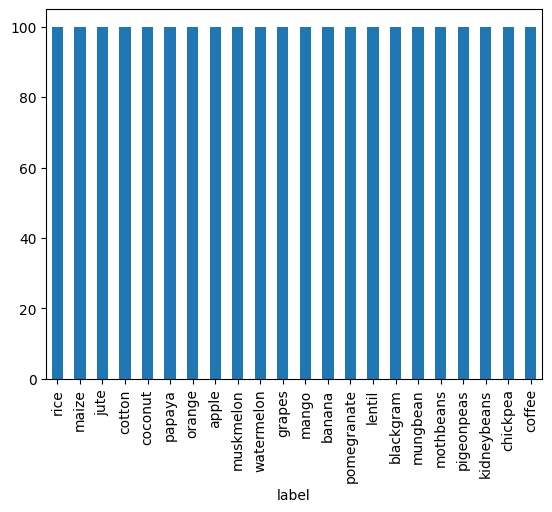


Integer Column Analysis:
count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64
count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64
count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64


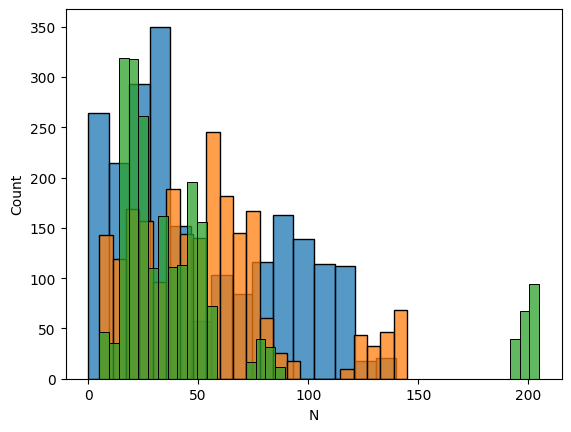


Float Column Analysis:
count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64
count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64
count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64
count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64


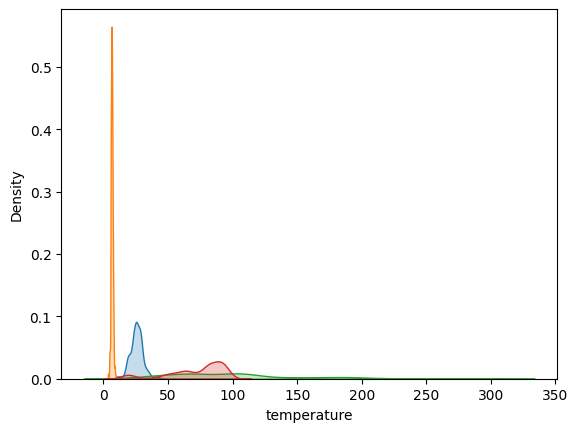

In [ ]:
# Data Distribution
# Analysis of Object Column
print("Object Column Analysis:")
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')
plt.show()

# Analysis of Integer Column
print("\nInteger Column Analysis:")
print(df['N'].describe())
print(df['P'].describe())
print(df['K'].describe())
sns.histplot(df['N'], kde=False)
sns.histplot(df['P'], kde=False)
sns.histplot(df['K'], kde=False)
plt.show()

# Analysis of Float Column
print("\nFloat Column Analysis:")
print(df['temperature' ].describe())
print(df['humidity' ].describe())
print(df['ph' ].describe())
print(df['rainfall' ].describe())
sns.kdeplot(df['temperature'], fill=True)
sns.kdeplot(df['ph'], fill=True)
sns.kdeplot(df['rainfall'], fill=True)
sns.kdeplot(df['humidity'], fill=True)
plt.show()

# **Data Preproccessing**
Data Cleaning

In this codes all the cleaning of the dataset is done.this includes checking of missing values, checking NAN, N/A, Unknown VAlues in the dataset. this will ensure that the dataset to be used for modelling is clean hence no much errors in execution and the model will not give wrong predictions.

In [ ]:
#Checking Missing Values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
#Checking NAN, N/A, Unknown VAlues in the dataset
object_columns = df.select_dtypes(include= "object").columns
placeholders = ["NA", "Unknown", "missing", "N/A"]
placeholder_mask = df[object_columns].apply(lambda x: x.isin(placeholders))
print(placeholder_mask.sum())
whitespace_mask = df[object_columns].apply(lambda x: x.str.strip() == '')
print(df[object_columns].isnull().sum())
print(df[object_columns].eq('').sum())
print(whitespace_mask.sum())

label    0
dtype: int64
label    0
dtype: int64
label    0
dtype: int64
label    0
dtype: int64


Handling Categorical Values Using One-Hot Encoder

In this section categorical values are changed to binary for easy readability by the computer since it doesn't read the said dtypes.
One-Hot encoder is used in the coding
first check the number of columns with categorical values then proceed to encode.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)  

Categorical Columns: ['label']


In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded)

        N   P   K  ...  label_pomegranate  label_rice  label_watermelon
0      90  42  43  ...              False        True             False
1      85  58  41  ...              False        True             False
2      60  55  44  ...              False        True             False
3      74  35  40  ...              False        True             False
4      78  42  42  ...              False        True             False
...   ...  ..  ..  ...                ...         ...               ...
2195  107  34  32  ...              False       False             False
2196   99  15  27  ...              False       False             False
2197  118  33  30  ...              False       False             False
2198  117  32  34  ...              False       False             False
2199  104  18  30  ...              False       False             False

[2200 rows x 28 columns]


#import the neccesary libraries to be used.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(categorical_cols)
)

final_df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
print(final_df)

        N   P   K  ...  label_pomegranate  label_rice  label_watermelon
0      90  42  43  ...                0.0         1.0               0.0
1      85  58  41  ...                0.0         1.0               0.0
2      60  55  44  ...                0.0         1.0               0.0
3      74  35  40  ...                0.0         1.0               0.0
4      78  42  42  ...                0.0         1.0               0.0
...   ...  ..  ..  ...                ...         ...               ...
2195  107  34  32  ...                0.0         0.0               0.0
2196   99  15  27  ...                0.0         0.0               0.0
2197  118  33  30  ...                0.0         0.0               0.0
2198  117  32  34  ...                0.0         0.0               0.0
2199  104  18  30  ...                0.0         0.0               0.0

[2200 rows x 28 columns]


# Normalizing  numerical data using Standard Scaler

- Scaling/normalizing features will adjust the numbers in our dataset, making it even easier for a machine to analyze patterns in a fair manner therefore, one feature will not dominate another because it has bigger numbers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('rainfall', axis=1)
y = df['ph']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

Columns in X_train: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label']
Columns in X_test: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label']


In [ ]:
numerical_cols = ["N"]
categorical_cols = ["label"]

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

import scipy.sparse as sp
X_train_final = sp.hstack([X_train_num, X_train_cat])
X_test_final = sp.hstack([X_test_num, X_test_cat])

# **Handling imbalanced datasets**

This is where all the imbalanced datasest are balanced to enable the model to reduce favourism in the prediction.
Smotek will be used 

In [ ]:
y = y.astype(str)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
X_train = y_train.astype(int)
X_test = y_test.astype(int)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(categorical_cols)
)

final_df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
print(final_df)

        N   P   K  ...  label_pomegranate  label_rice  label_watermelon
0      90  42  43  ...                0.0         1.0               0.0
1      85  58  41  ...                0.0         1.0               0.0
2      60  55  44  ...                0.0         1.0               0.0
3      74  35  40  ...                0.0         1.0               0.0
4      78  42  42  ...                0.0         1.0               0.0
...   ...  ..  ..  ...                ...         ...               ...
2195  107  34  32  ...                0.0         0.0               0.0
2196   99  15  27  ...                0.0         0.0               0.0
2197  118  33  30  ...                0.0         0.0               0.0
2198  117  32  34  ...                0.0         0.0               0.0
2199  104  18  30  ...                0.0         0.0               0.0

[2200 rows x 28 columns]


In [ ]:
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")

X_train_processed shape: (1760, 1)
y_train_encoded shape: (1540,)


In [ ]:
print("Updated class distribution:\n", y_train_encoded.value_counts())

Updated class distribution:
 12    67
10    65
17    61
15    58
20    53
      ..
52     5
58     4
2      4
56     4
59     3
Name: count, Length: 73, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


smote = SMOTE(k_neighbors=2, random_state=42)  
smote_tomek = SMOTETomek(smote=smote, random_state=42)


X_resampled, y_resampled = smote_tomek.fit_resample(X_train_processed, y_train_encoded)

#Feature Engineering

- The code will enhance our data by generating new features that will help us in predictive modeling.
- All the below features will help our models understand trends, historical patterns for better prediction

In [ ]:
# Nutrient ratios
df['N_P_ratio'] = df['N'] / df['P']
df['N_K_ratio'] = df['N'] / df['K']
df['P_K_ratio'] = df['P'] / df['K']

# NPK composite score 
df['npk_score'] = (df['N'] * 0.4) + (df['P'] * 0.3) + (df['K'] * 0.3)

In [ ]:
optimal_ph = {
    'wheat': (6.0, 7.0),
    'rice': (5.0, 6.5),
    'corn': (5.8, 6.8),
}

def ph_suitability(row):
    crop = row['label']
    min_ph, max_ph = optimal_ph.get(crop, (0, 14))
    return 1 if min_ph <= row['ph'] <= max_ph else 0

df['ph_suitability'] = df.apply(ph_suitability, axis=1)

In [ ]:
base_temp = 10  
df['daily_avg_temp'] = (df['temperature'] + df['temperature']) / 2
df['gdd'] = (df['daily_avg_temp'] - base_temp).clip(lower=0)
df['cumulative_gdd'] = df.groupby('label')['gdd'].cumsum()

In [ ]:
#Humidity
df['temp_humidity_index'] = df['temperature'] * df['humidity'] / 100  # Normalize humidity

In [ ]:
#Crop growth stage
growth_stages = {
    'wheat': {0: 'germination', 500: 'tillering', 1200: 'flowering'},
    'corn': {0: 'emergence', 800: 'vegetative', 1500: 'tasseling'},
}

def get_growth_stage(row):
    crop = row['label']
    cumulative_gdd = row['cumulative_gdd']
    stages = growth_stages.get(crop, {})
    for threshold in sorted(stages.keys(), reverse=True):
        if cumulative_gdd >= threshold:
            return stages[threshold]
    return 'unknown'

df['growth_stage'] = df.apply(get_growth_stage, axis=1)

In [ ]:
# water requirements (mm/day)
crop_water_req = {
    'wheat': 5.0,
    'rice': 10.0,
    'corn': 7.0,
}

df['water_deficit'] = df['label'].map(crop_water_req) - df['rainfall']

In [ ]:
df['cumulative_rainfall'] = df.groupby(['label'])['rainfall'].cumsum()

In [ ]:
df['7d_avg_temp'] = df.groupby('label')['temperature'].rolling(window=7).mean().reset_index(level=0, drop=True)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
crop_encoded = encoder.fit_transform(df[['label']])
crop_cols = encoder.get_feature_names_out(['label'])
df[crop_cols] = crop_encoded

growth_stage_order = ['germination', 'tillering', 'flowering', 'harvest']
df['growth_stage_encoded'] = df['growth_stage'].map({stage: idx for idx, stage in enumerate(growth_stage_order)})

#Removing Irrelevant columns
The target is to remove unwanted columns that do not add any value to the modelling proccess. This will also help to remove data will may bring arnomalies or give wrong predictions to the maodel.
Also this will help remove columns with NAN, Na and missing values.

In [ ]:
irrelevant = ['growth_stage_encoded']  
df = df.drop(columns=irrelevant, errors='ignore')

Data Splitting

The target of the code in section is to split dataset into training, validation and testing datasets. This is for modelling purposes. the dataset will be split into 70% Training, 15% Validation and 15% Testing Datasets.

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,N_P_ratio,N_K_ratio,P_K_ratio,npk_score,ph_suitability,daily_avg_temp,gdd,cumulative_gdd,temp_humidity_index,growth_stage,water_deficit,cumulative_rainfall,7d_avg_temp,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,label_lentil,label_maize,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2.142857,2.093023,0.976744,61.5,0,20.879744,10.879744,10.879744,17.121963,unknown,-192.935536,202.935536,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.465517,2.073171,1.414634,63.7,0,21.770462,11.770462,22.650205,17.485957,unknown,-216.655537,429.591074,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.090909,1.363636,1.250000,53.7,0,23.004459,13.004459,35.654665,18.937446,unknown,-253.964248,693.555321,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2.114286,1.850000,0.875000,52.1,0,26.491096,16.491096,52.145761,21.234829,unknown,-232.864034,936.419355,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.857143,1.857143,1.000000,56.4,0,20.130175,10.130175,62.275936,16.427204,unknown,-252.717340,1199.136696,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = df.drop('N', axis=1)  # 
y = df['K']               # 

# First split: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    
)

# Second split: Split temp into 15% val and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
   
)

print(f"Train: {len(X_train)} ({len(X_train)/len(X):.1%})")
print(f"Val:   {len(X_val)} ({len(X_val)/len(X):.1%})")
print(f"Test:  {len(X_test)} ({len(X_test)/len(X):.1%})")

Train: 1540 (70.0%)
Val:   330 (15.0%)
Test:  330 (15.0%)


In [ ]:
print("Non-numeric columns:")
print(X_train.select_dtypes(include=['object', 'category']).columns.tolist())

Non-numeric columns:
['label', 'growth_stage']


In [ ]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = encoder.transform(X_val[categorical_cols])

numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
X_train_final = np.hstack([X_train[numeric_cols].values, X_train_encoded])
X_val_final = np.hstack([X_val[numeric_cols].values, X_val_encoded])

#Model Selection

This is where the model is selected. However four types of models will be selected trained, validated and tested to check the best performing model. This will be used for the prediction. The four types are random forest, SVM, Decision Tree and Logic regression. 

In [ ]:
print("NaN in X_train_final:", np.isnan(X_train_final).sum(axis=0))

print("NaN in X_val_final:", np.isnan(X_val_final).sum(axis=0))

NaN in X_train_final: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1468    0   88    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
NaN in X_val_final: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 315   0  24
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_final)
X_val_imputed = imputer.transform(X_val_final)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),  
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_val, y_val)
    print(f"{name}: Validation Accuracy = {score:.2f}")

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Validation Accuracy = 0.11
Decision Tree: Validation Accuracy = 0.66
Random Forest: Validation Accuracy = 0.46
SVM: Validation Accuracy = 0.06


In [ ]:
categorical_features = ['label']  
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())
    ])
}

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold


print(X.dtypes)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

P                        int64
K                        int64
temperature            float64
humidity               float64
ph                     float64
rainfall               float64
label                   object
N_P_ratio              float64
N_K_ratio              float64
P_K_ratio              float64
npk_score              float64
ph_suitability           int64
daily_avg_temp         float64
gdd                    float64
cumulative_gdd         float64
temp_humidity_index    float64
growth_stage            object
water_deficit          float64
cumulative_rainfall    float64
7d_avg_temp            float64
label_apple            float64
label_banana           float64
label_blackgram        float64
label_chickpea         float64
label_coconut          float64
label_coffee           float64
label_cotton           float64
label_grapes           float64
label_jute             float64
label_kidneybeans      float64
label_lentil           float64
label_maize            float64
label_ma

In [ ]:

if hasattr(X_train, 'select_dtypes'):
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
else:
    print("X_train is not a DataFrame, please specify column indices manually")


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])


results = {}
for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_val, y_val)
    results[name] = score
    print(f"{name}: Validation Accuracy = {score:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ValueError: Specifying the columns using strings is only supported for dataframes.

#Model Training

This is where the models are trained by the dataset selected. this will enable it to pick algorithms ready for prediction

In [ ]:
X_full_train = np.concatenate([X_train_imputed, X_val_imputed])
y_full_train = np.concatenate([y_train, y_val])

In [ ]:

final_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=10,
    random_state=42
)

final_model.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['P', 'K', 'temperature',
                                                   'humidity', 'ph', 'rainfall',
                                                   'N_P_ratio', 'N_K_ratio',
                                                   'P_K_ratio', 'npk_score',
                                                   'ph_suitability',
                                                   'daily_avg_temp', 'gdd',
                                                   'cumulative_gdd',
                                                   'temp_humidity_index',
                                                   'water_deficit',
                                                   'cumulative_rainfall',
                                                   '7d_avg_temp', 'label_apple',
                                                   'label_banana',
                                                   'label_blackgram',
                                                   'label_chickpea',
                                                   'label_coconut',
                                                   'label_coffee',
                                                   'label_cotton',
                                                   'label_grapes', 'label_jute',
                                                   'label_kidneybeans',
                                                   'label_lentil',
                                                   'label_maize', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['label', 'growth_stage'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
test_accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.45


In [ ]:
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)
print("Training features:", X_train_processed.shape[1])  

X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
print("Test features:", X_test_processed.shape[1])       

Training features: 63
Test features: 63


In [ ]:
if isinstance(X_train, pd.DataFrame):
    
    numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
else:
    
    numeric_columns = list(range(0, 6))  
    categorical_columns = list(range(6, 11))  

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


preprocessor.fit(X_train)


X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)  

print(f"Processed training shape: {X_train_processed.shape}")
print(f"Processed test shape: {X_test_processed.shape}")

test_accuracy = final_model.score(X_test_processed, y_test)
print(f"Test accuracy: {test_accuracy}")

Numeric columns: ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'npk_score', 'ph_suitability', 'daily_avg_temp', 'gdd', 'cumulative_gdd', 'temp_humidity_index', 'water_deficit', 'cumulative_rainfall', '7d_avg_temp', 'label_apple', 'label_banana', 'label_blackgram', 'label_chickpea', 'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes', 'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize', 'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon', 'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate', 'label_rice', 'label_watermelon']
Categorical columns: ['label', 'growth_stage']


Processed training shape: (1540, 63)
Processed test shape: (330, 63)
Test accuracy: 0.03333333333333333


#Fine-tune hyperparameters using RandomizedSearchCV

this will ensure smooth running of the models on the dataset

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
param_dist = {
    
    'n_estimators': randint(100, 500),  
    
    'max_depth': [None, 10, 20, 30],  
    
        'min_samples_split': randint(2, 10), 
    
        'min_samples_leaf': randint(1, 5),
    
        'max_features': ['sqrt', 'log2', None],
    
        'bootstrap': [True, False],
    
        'class_weight': [None, 'balanced']
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,       
    scoring='accuracy',
    n_jobs=-1,  
    random_state=42,
    verbose=1
)

In [ ]:
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_features = ['label']  


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    # Other parameters...
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['P',
                                                                                'K',
                                                                                'temperature',
                                                                                'humidity',
                                                                                'ph',
                                                                                'rainfall',
                                                                                'N_P_ratio',
                                                                                'N_K_ratio',
                                                                                'P_K_ratio',
                                                                                'npk_score',
                                                                                'ph_suitability',
                                                                                'daily_avg_temp',
                                                                                'gdd',
                                                                                'cumulative_gdd'...
                                                                                'label_maize', ...]),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['label',
                                                                                'growth_stage'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   scoring='accuracy', verbose=1)

#Cross Validation of the Models

In [ ]:
print(X.dtypes)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


kfold = KFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=kfold,
    scoring='accuracy'
)

print(f"KFold Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

P                        int64
K                        int64
temperature            float64
humidity               float64
ph                     float64
rainfall               float64
label                   object
N_P_ratio              float64
N_K_ratio              float64
P_K_ratio              float64
npk_score              float64
ph_suitability           int64
daily_avg_temp         float64
gdd                    float64
cumulative_gdd         float64
temp_humidity_index    float64
growth_stage            object
water_deficit          float64
cumulative_rainfall    float64
7d_avg_temp            float64
label_apple            float64
label_banana           float64
label_blackgram        float64
label_chickpea         float64
label_coconut          float64
label_coffee           float64
label_cotton           float64
label_grapes           float64
label_jute             float64
label_kidneybeans      float64
label_lentil           float64
label_maize            float64
label_ma

#Model Evaluation

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import label_binarize

classes = model.classes_  
y_test_bin = label_binarize(y_test, classes=classes)


roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print(f"ROC-AUC (multi-class): {roc_auc:.2f}")


ROC-AUC (multi-class): nan


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [ ]:
from sklearn.preprocessing import label_binarize

classes = model.classes_


y_test_bin = label_binarize(y_test, classes=classes)


roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')

print(f"ROC-AUC (multi-class): {roc_auc:.2f}")


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


ROC-AUC (multi-class): nan


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
print("y_proba shape:", y_proba.shape)
print("Classes:", model.classes_)


y_proba shape: (440, 73)
Classes: [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  75  76  77
  78  79  80  81  82  83  84  85 195 196 197 198 199 200 201 202 203 204
 205]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test) 


print(classification_report(y_test, y_pred))
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


classes = model.classes_


y_test_bin = label_binarize(y_test, classes=classes)


roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')

print(f"ROC-AUC (multi-class OVR): {roc_auc:.2f}")


              precision    recall  f1-score   support

           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         0
          12       0.50      1.00      0.67         1
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          15       1.00      0.85      0.92        13
          16       0.79      0.85      0.81        13
          17       0.75      0.92      0.83        13
          18       1.00      0.85      0.92        13
          19       0.89      0.94      0.91        17
          20       0.93      0.76      0.84        17
          21       0.89      0.84      0.86        19
          22       0.65      0.92      0.76        12
          23       0.36    

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

#Selection of the Best performing Model

Selecting the best model will be achieved by checking F1-SCORE, ROC-AUC AND ACCURACY

In [ ]:
print(type(results))
print(results)


<class 'dict'>
{'Logistic Regression': 0.18484848484848485, 'Random Forest': 0.4818181818181818, 'Decision Tree': 0.9939393939393939, 'SVM': 0.09393939393939393}


In [ ]:
results_df = pd.DataFrame([results])  


In [ ]:
from sklearn.pipeline import make_pipeline
results = []
imputer = SimpleImputer(strategy='mean')

for name, model in models.items():
    pipeline = make_pipeline(imputer, model)

    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)

        y_test_bin = label_binarize(y_test, classes=pipeline.named_steps[model.__class__.__name__.lower()].classes_)

        if y_test_bin.shape[1] > 1:
            roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = float('nan')

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred, average='macro'),
            "ROC-AUC": roc_auc
        }

        results.append(metrics)

    except Exception as e:
        print(f"{name} failed: {e}")


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

In [ ]:

results = []

for name, model in models.items():
    ...
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, average='macro'),
        "ROC-AUC": roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
    }
    results.append(metrics)


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [ ]:

y_test_bin = label_binarize(y_test, classes=model.classes_)

if y_test_bin.shape[1] > 1:
    roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
else:
    roc_auc = float('nan')  


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [ ]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="ROC-AUC", ascending=False))


                 Model  Accuracy  F1-score  ROC-AUC
0  Logistic Regression  0.047727  0.006708      NaN
1        Random Forest  0.047727  0.006708      NaN
2        Decision Tree  0.047727  0.006708      NaN
3                  SVM  0.047727  0.006708      NaN


In [ ]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='f1_macro')
print("Mean F1-score:", scores.mean())


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mean F1-score: 0.337446338289877


In [ ]:
print("Unique classes in y_test:", set(y_test))


Unique classes in y_test: {7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 195, 196, 197, 198, 199, 200, 201, 202, 203, 76, 204, 78, 77, 205, 79, 82, 83, 75, 85, 81}


In [ ]:
model = LogisticRegression(max_iter=2000)  


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


imputer = SimpleImputer(strategy='mean')  


results = []
for name, model in models.items():
    
    pipeline = make_pipeline(imputer, model)
    
    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test) if hasattr(pipeline, "predict_proba") else None
        
        
        if y_proba is not None:
            y_test_bin = label_binarize(y_test, classes=model.classes_)
            roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = float('nan')

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred, average='macro'),
            "ROC-AUC": roc_auc
        }

        results.append(metrics)
    
    except Exception as e:
        print(f"{name} failed: {e}")

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="ROC-AUC", ascending=False))


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

                 Model  Accuracy  F1-score  ROC-AUC
0  Logistic Regression  0.102273  0.056020      NaN
1        Random Forest  0.604545  0.443794      NaN
2        Decision Tree  0.993182  0.988072      NaN
3                  SVM  0.047727  0.006708      NaN


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)


HistGradientBoostingClassifier()

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


results = []


for name, model in models.items():
    
    pipeline = make_pipeline(SimpleImputer(strategy='mean'), model)
    
    try:
        
        pipeline.fit(X_train, y_train)
        
        s
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test) if hasattr(pipeline, "predict_proba") else None
        
        if y_proba is not None:
            y_test_bin = label_binarize(y_test, classes=model.classes_)
            roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = float('nan')  
        
        
        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred, average='macro'),
            "ROC-AUC": roc_auc
        }
        
        
        results.append(metrics)
    
    except Exception as e:
        print(f"Model {name} failed: {e}")


results_df = pd.DataFrame(results)
print(results_df.sort_values(by="ROC-AUC", ascending=False))


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

                 Model  Accuracy  F1-score  ROC-AUC
0  Logistic Regression  0.047727  0.015548      NaN
1        Decision Tree  0.993182  0.988072      NaN
2        Random Forest  0.568182  0.411699      NaN


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python

#Model Explainability and Interpretabilty using LME

In [ ]:
print(X_train.describe())  


                 P            K  temperature     humidity           ph  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000   
mean     53.409659    48.136364    25.579640    71.559997     6.475940   
std      33.228169    51.078128     5.090070    22.024009     0.773445   
min       5.000000     5.000000     8.825675    14.273280     3.504752   
25%      28.000000    20.000000    22.756264    60.280638     5.964518   
50%      51.000000    31.000000    25.596201    80.511845     6.433084   
75%      68.000000    48.000000    28.523840    89.902572     6.927832   
max     145.000000   205.000000    43.675493    99.981876     9.935091   

          rainfall        label    N_P_ratio    N_K_ratio    P_K_ratio  ...  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000  ...   
mean    102.661255    10.543750     1.717098     1.687103     1.682016  ...   
std      54.951994     6.304326     2.647817     1.525676     1.210874  ...   
min      20.36001

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['class_0', 'class_1'],
    mode='classification',
    discretize_continuous=False  # 
)


In [ ]:
print(X_train.isna().sum())


P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
N_P_ratio                 0
N_K_ratio                 0
P_K_ratio                 0
npk_score                 0
ph_suitability            0
daily_avg_temp            0
gdd                       0
cumulative_gdd            0
temp_humidity_index       0
growth_stage              0
water_deficit          1679
cumulative_rainfall       0
7d_avg_temp             102
label_apple               0
label_banana              0
label_blackgram           0
label_chickpea            0
label_coconut             0
label_coffee              0
label_cotton              0
label_grapes              0
label_jute                0
label_kidneybeans         0
label_lentil              0
label_maize               0
label_mango               0
label_mothbeans           0
label_mungbean            0
label_muskmelon     

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


In [ ]:
explainer = LimeTabularExplainer(
    training_data=X_train_imputed.values,
    feature_names=X_train.columns,
    class_names=['class_0', 'class_1'],
    mode='classification',
    discretize_continuous=False
)

instance = X_train_imputed.iloc[0].values
explanation = explainer.explain_instance(instance, model.predict_proba)
explanation.show_in_notebook()


#Feature Importance Analysis Using Built-in Feature Importances (Tree-based Models)

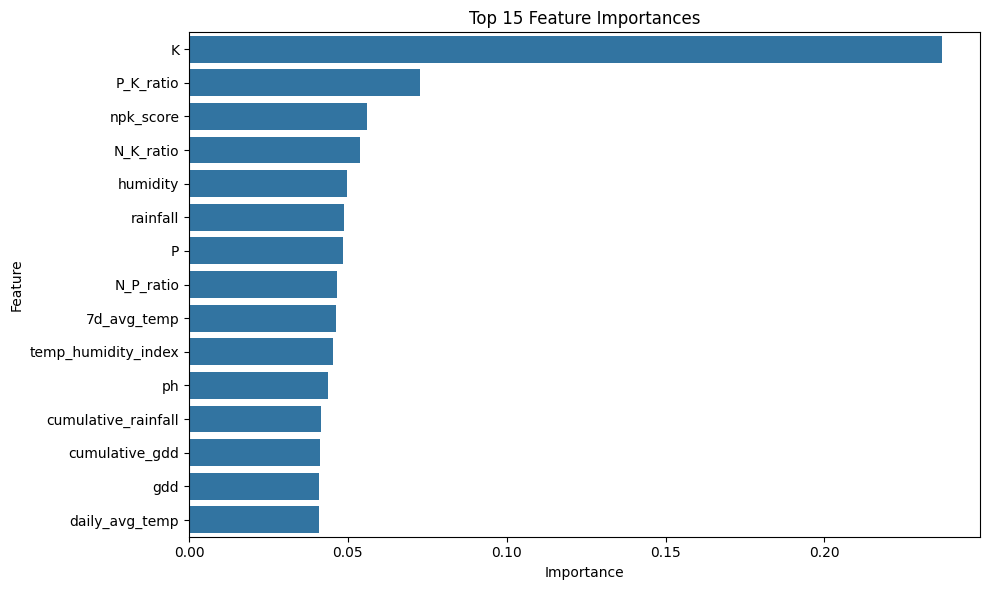

In [ ]:
import seaborn as sns


importances = model.feature_importances_
features = X_train.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()


#Checking for Bias and Fairness

In [ ]:
from sklearn.metrics import classification_report


X_test_copy = X_test.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = model.predict(X_test)

for group in X_test_copy['rainfall'].unique():
    group_data = X_test_copy[X_test_copy['rainfall'] == group]
    print(f"\nGroup: {group}")
    print(classification_report(group_data['y_true'], group_data['y_pred']))


C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p


Group: 26.30820876
              precision    recall  f1-score   support

          47       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 49.43050977
              precision    recall  f1-score   support

          51       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 114.778071
              precision    recall  f1-score   support

          49       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg   

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          42       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 164.2697011
              precision    recall  f1-score   support

          35       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 134.83703480000003
              precision    recall  f1-score   support

          26       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 103.8799347
              precision    recall  f1-score   support

     

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          42       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 36.10211371
              precision    recall  f1-score   support

          19       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 189.9711184
              precision    recall  f1-score   support

          42       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 66.47264636
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 160.389421
              precision    recall  f1-score   support

          29       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 20.39020503
              precision    recall  f1-score   support

          49       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 74.05474936
              

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          28       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 51.92057267
              precision    recall  f1-score   support

          22       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 110.6857506
              precision    recall  f1-score   support

          11       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00 

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          81       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 192.3197536
              precision    recall  f1-score   support

          42       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 70.4713043
              precision    recall  f1-score   support

          20       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 103.5684926
              

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          30       0.00      0.00      0.00       0.0
          34       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 61.91208707
              precision    recall  f1-score   support

          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 50.90994463
              precision    recall  f1-score   support

          21       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 195.4115025
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          44       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 86.84998693
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 108.3121789
              precision    recall  f1-score   support

          36       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 173.1686574
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          27       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 111.78037340000002
              precision    recall  f1-score   support

           8       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 127.7767134
              precision    recall  f1-score   support

          21       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 110.3262123
      

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15


Group: 72.19245835
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 44.64407105
              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 35.36831423
              precision    recall  f1-score   support

          22       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 44.07843475
              precision    recall  f1-score   support

          54       1.00      1.00      1.00   

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          52       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 66.00817551
              precision    recall  f1-score   support

         204       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 65.70148216
              precision    recall  f1-score   support

         196       0.00      0.00      0.00       0.0
         200       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 71.36947525
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          41       0.00      0.00      0.00       0.0
          44       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 41.53749535
              precision    recall  f1-score   support

          23       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 82.68554379
              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 107.3944717
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          52       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 139.5013171
              precision    recall  f1-score   support

          25       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 68.83924882
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 104.6252153
              precision    recall  f1-score   support

          22       1.00      1.00      1.00         1

    accurac

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          48       0.00      0.00      0.00       0.0
          49       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 25.08146686
              precision    recall  f1-score   support

          50       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 100.3060719
              precision    recall  f1-score   support

          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 95.04871605
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

         203       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 107.6103211
              precision    recall  f1-score   support

          36       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 181.4170812
              precision    recall  f1-score   support

          34       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 83.75937135
              precision    recall  f1-score   support

          82       0.00      0.00      0.00       1.0
          85

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15


Group: 74.51490791
              precision    recall  f1-score   support

          16       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 209.84539930000005
              precision    recall  f1-score   support

          30       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 62.49190812
              precision    recall  f1-score   support

          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 69.09512477
              precision    recall  f1-sc

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 90.46228334
              precision    recall  f1-score   support

          77       0.00      0.00      0.00       1.0
          85       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 43.87712348
              precision    recall  f1-score   support

          50       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 93.10247183
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          80       0.00      0.00      0.00       0.0
          82       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 48.83810592
              precision    recall  f1-score   support

          47       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 53.14531023
              precision    recall  f1-score   support

          23       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 116.6912176
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15


Group: 58.97878791
              precision    recall  f1-score   support

          50       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 144.7902323
              precision    recall  f1-score   support

          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 25.09484511
              precision    recall  f1-score   support

          45       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 89.98024312
              precision    recall  f1-score   s

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          26       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 65.0247867
              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 66.53946559
              precision    recall  f1-score   support

         196       0.00      0.00      0.00       0.0
         198       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 121.4977331
              

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          35       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 50.55710813
              precision    recall  f1-score   support

          45       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 73.37686831
              precision    recall  f1-score   support

          18       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 63.72358154
              precision    recall  f1-score   support

          22

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          22       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 80.36146974
              precision    recall  f1-score   support

          17       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 42.10681516
              precision    recall  f1-score   support

          53       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 117.0761277
              precision    recall  f1-score   support

         196       1.00      1.00      1.00         1

    accurac

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          42       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 109.022564
              precision    recall  f1-score   support

          45       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 70.31782647
              precision    recall  f1-score   support

         199       0.00      0.00      0.00       0.0
         200       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 185.25947
              precision    recall  f1-score   support

          35   

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

          19       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Group: 197.5282582
              precision    recall  f1-score   support

          47       0.00      0.00      0.00       0.0
          50       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 57.04147057
              precision    recall  f1-score   support

          50       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Group: 35.37493212
             

C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kipng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

In [ ]:
y_test_binary = (y_test == 4).astype(int)
y_pred_binary = (y_pred == 4).astype(int)


In [ ]:
print("y_test unique labels:", y_test.unique())
print("y_pred unique labels:", pd.Series(y_pred).unique())


y_test unique labels: [ 47  51  49  55 200  27 195  24  18  22  31  42  35  26  41  21  45  33
  53  13  54  85  40  20   8  38  43  19  17  82  78  28  25  29 196  34
  15  48  23  14  52   9  37  50  12  83   7  30  16  46 203  76 197 199
  10  39 204  32  44  77 201 205  79  75 202  36 198  81]
y_pred unique labels: [ 48  52  55 198  27 196  22  24  18  31  42  35  33  41 201  20  47  53
  10  54  85  45   8  21  36  38  19  17  43  81  78  30  23  50  29  34
  15  28  11  14  13  26  25  16  44  40 203  77 202 197 199   6 204  76
  49  75 195 205  39  82  84  32  80  37  51  12]


In [ ]:

threshold = 50

y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate
from sklearn.metrics import accuracy_score

metric_frame = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "selection_rate": selection_rate,
        "true_positive_rate": true_positive_rate,
        "false_positive_rate": false_positive_rate
    },
    y_true=y_test_binary,
    y_pred=y_pred_binary,
    sensitive_features=sensitive_feature
)

print(metric_frame.by_group)


             accuracy  selection_rate  true_positive_rate  false_positive_rate
temperature                                                                   
9.949929          1.0             1.0                 1.0                  0.0
10.356096         1.0             0.0                 0.0                  0.0
11.189943         1.0             1.0                 1.0                  0.0
11.698946         1.0             0.0                 0.0                  0.0
13.837728         1.0             0.0                 0.0                  0.0
...               ...             ...                 ...                  ...
40.769987         1.0             0.0                 0.0                  0.0
42.134740         1.0             0.0                 0.0                  0.0
42.394134         1.0             0.0                 0.0                  0.0
42.936054         1.0             0.0                 0.0                  0.0
43.360515         0.0             1.0               

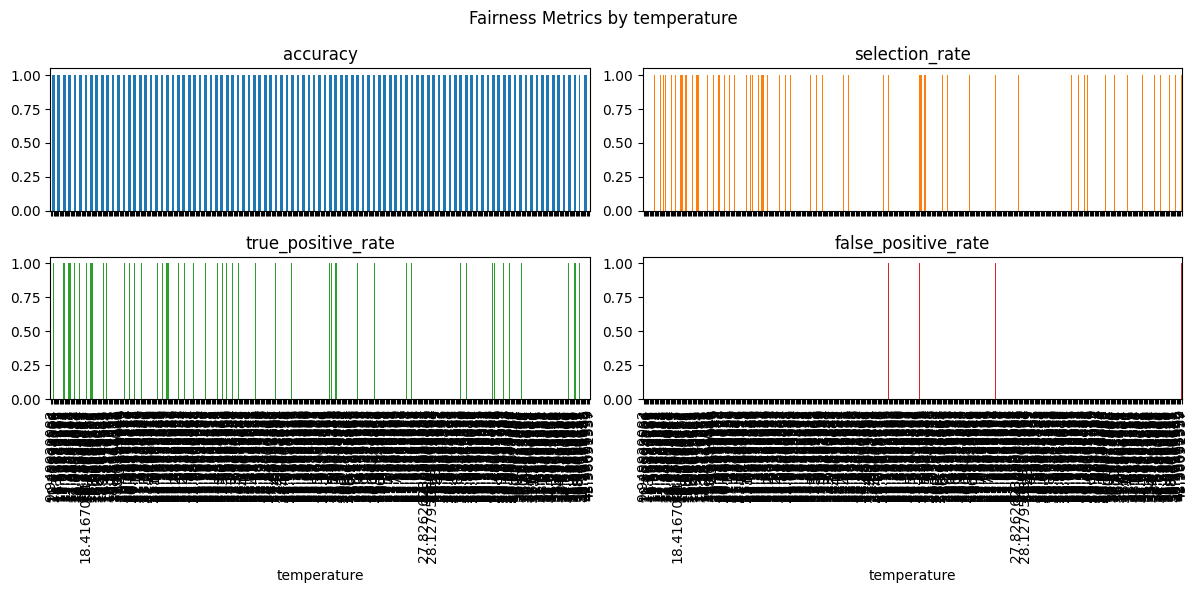

In [ ]:
metric_frame.by_group.plot.bar(subplots=True, layout=(2, 2), figsize=(12, 6), legend=False)
plt.suptitle("Fairness Metrics by temperature")
plt.tight_layout()
plt.show()
